In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [3]:
result_oriented = pd.read_csv('result_oriented_runs.csv')
result_oriented['Converged Steps'] = pd.to_numeric(result_oriented['Converged Steps'], errors='coerce')

expectation_oriented = pd.read_csv('expectation_oriented_runs.csv')
expectation_oriented['Converged Steps'] = pd.to_numeric(expectation_oriented['Converged Steps'], errors='coerce')

# Combine the data
combined_data = pd.concat([result_oriented, expectation_oriented])
# Convert 'Anchor-Policy' to a categorical variable with a specific order
anchor_order = ['Fresh Start', '25k', '40k', '45k', '50k', '55k', '60k', '75k', '100k', '350k']
combined_data['Anchor-Policy'] = pd.Categorical(combined_data['Anchor-Policy'], categories=anchor_order, ordered=True)

# combined_data.to_csv('combined_strategy_runs.csv', index=False)
combined_csv = pd.read_csv('combined_strategy_runs.csv')

combined_csv.style.format({
}).set_properties(**{
    'text-align': 'center',
    'border': '1px solid black'
}).set_table_styles([
    dict(selector='th', props=[('text-align', 'center')]),
    dict(selector='th', props=[('background-color', '#f7f7f9')]),
    dict(selector='td', props=[('padding', '6px')])
])

combined_csv



,Task,Anchor-Policy,Strategy,Selected Demo States,Max Success Rate,Converged Steps,Notes
0,Left,Fresh Start,Result-Oriented,"0,6,7,8,7",0.80,400000.0,The success rate gradually increases from near...
1,Left,25k,Result-Oriented,"1,5,7,9,7",0.85,500000.0,The success rate reaches around 0.4 by 150k st...
2,Left,40k,Result-Oriented,"8,2,8,9,3",0.60,525000.0,"The success rate shows a slower rise, reaching..."
3,Left,45k,Result-Oriented,"0,6,0,8,7",0.80,250000.0,"The success rate shows consistent growth, reac..."
4,Left,50k,Result-Oriented,"6,2,2,4,3",0.40,500000.0,"The success rate rises very slowly, only reach..."
5,Left,55k,Result-Oriented,"0,6,7,8,7",0.80,400000.0,"The success rate rises consistently, reaching ..."
6,Left,60k,Result-Oriented,"4,7,3,7,5",0.60,500000.0,"The success rate improves gradually, reaching ..."
7,Left,75k,Result-Oriented,"2,4,5,1,6",0.60,300000.0,The success rate climbs steadily to 0.4 by app...
8,Left,100k,Result-Oriented,"8,2,8,3,4",0.65,570000.0,The success rate grows steadily to 0.3–0.4 by ...
9,Left,350k,Result-Oriented,"0,6,6,6,5",0.70,530000.0,Success rate starts improving only after 400k ...


c:\Users\Konstantin\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


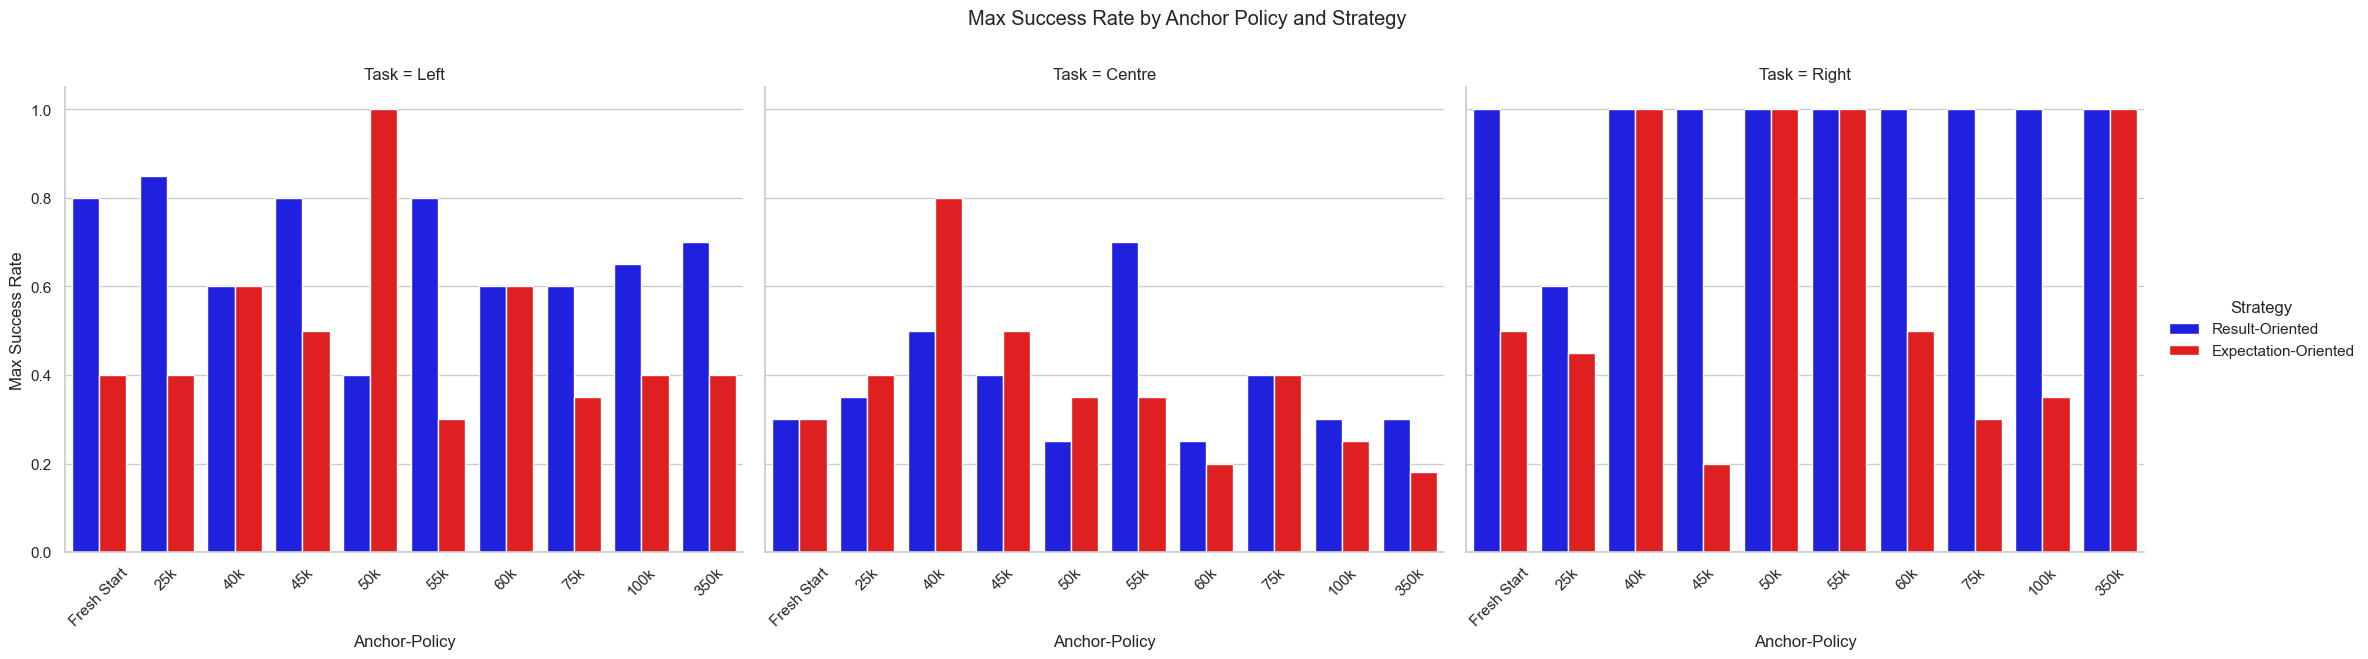

In [4]:
palette = {'Result-Oriented': 'blue', 'Expectation-Oriented': 'red'}

# Plotting
sns.set(style="whitegrid")
g = sns.catplot(
    data=combined_csv,
    x='Anchor-Policy',
    y='Max Success Rate',
    hue='Strategy',
    col='Task',
    kind='bar',
    height=6,
    aspect=1.2,
    palette=palette,
    legend_out=True,
)
g.set_xticklabels(rotation=45)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Max Success Rate by Anchor Policy and Strategy')
plt.show()


In [5]:
# Descriptive statistics for each Task and Strategy combination
desc_stats = combined_csv.groupby(['Task', 'Strategy'])['Max Success Rate'].agg(['mean', 'std', 'count']).reset_index()

# Separate data for statistical testing
tasks = combined_csv['Task'].unique()
results = {}

# Perform t-tests for each task to compare strategies
for task in tasks:
    result_oriented = combined_csv[(combined_csv['Task'] == task) & (combined_csv['Strategy'] == 'Result-Oriented')]['Max Success Rate']
    expectation_oriented = combined_csv[(combined_csv['Task'] == task) & (combined_csv['Strategy'] == 'Expectation-Oriented')]['Max Success Rate']
    
    # T-test
    t_stat, p_value = ttest_ind(result_oriented, expectation_oriented, equal_var=False)
    results[task] = {'t-stat': t_stat, 'p-value': p_value, 
                     'mean_result_oriented': result_oriented.mean(),
                     'mean_expectation_oriented': expectation_oriented.mean()}

# Display descriptive statistics and t-test results to the user
print(f"Left task: {results['Left']}")
print(f"Right task: {results['Right']}")
print(f"Center task: {results['Centre']}")




Left task: {'t-stat': 2.3811848767777994, 'p-value': 0.030171023951761886, 'mean_result_oriented': 0.68, 'mean_expectation_oriented': 0.4950000000000001}
Right task: {'t-stat': 2.945072380678212, 'p-value': 0.012685010405737144, 'mean_result_oriented': 0.96, 'mean_expectation_oriented': 0.6299999999999999}
Center task: {'t-stat': 0.027979402306349647, 'p-value': 0.9780063411399951, 'mean_result_oriented': 0.37499999999999994, 'mean_expectation_oriented': 0.373}


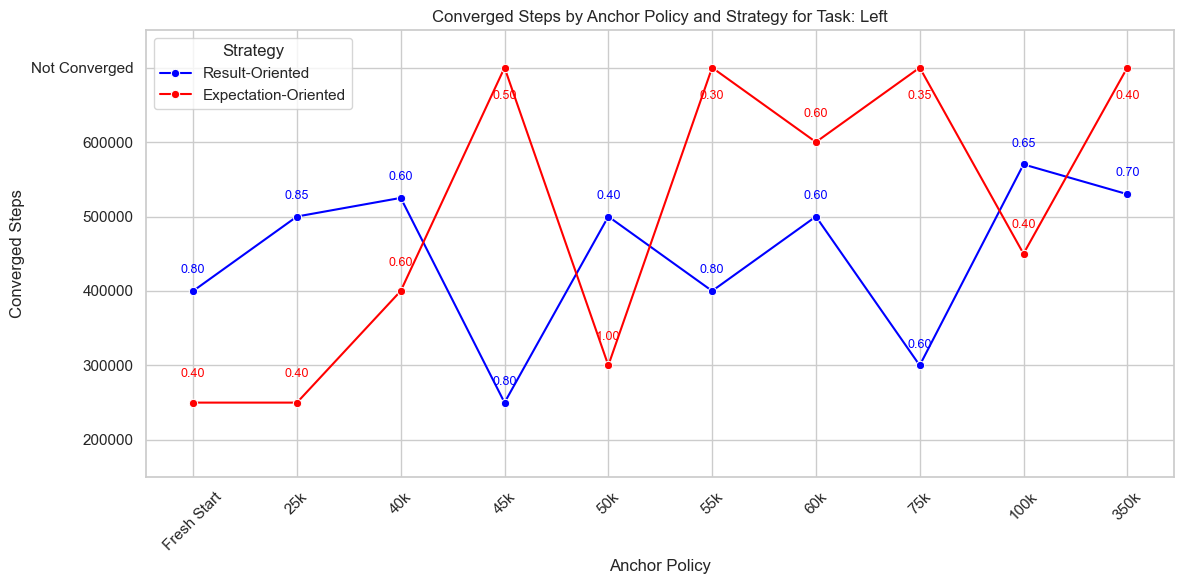

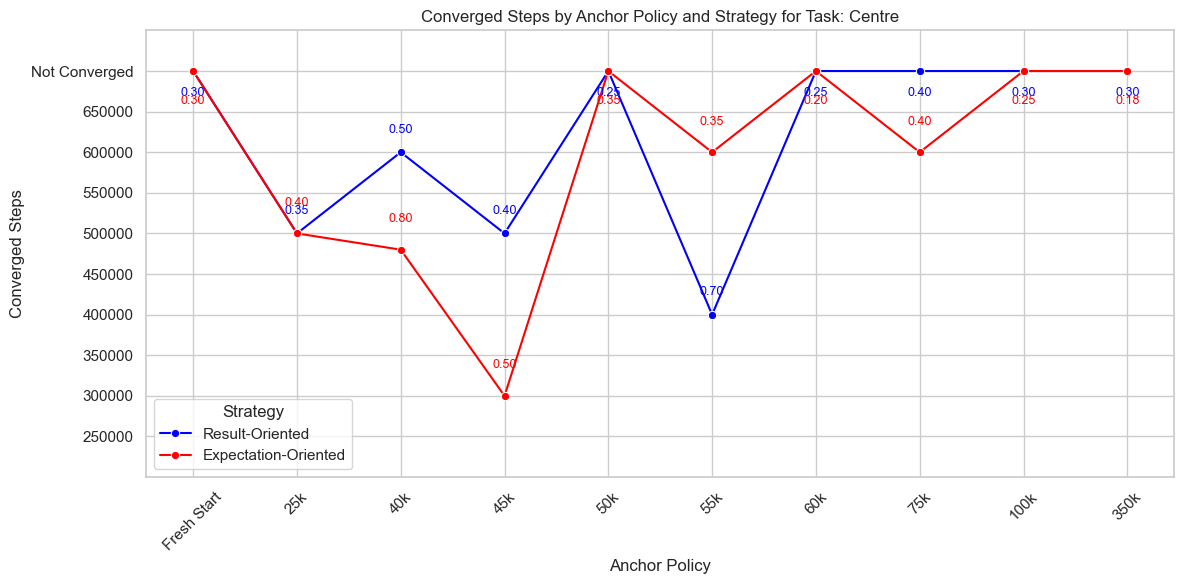

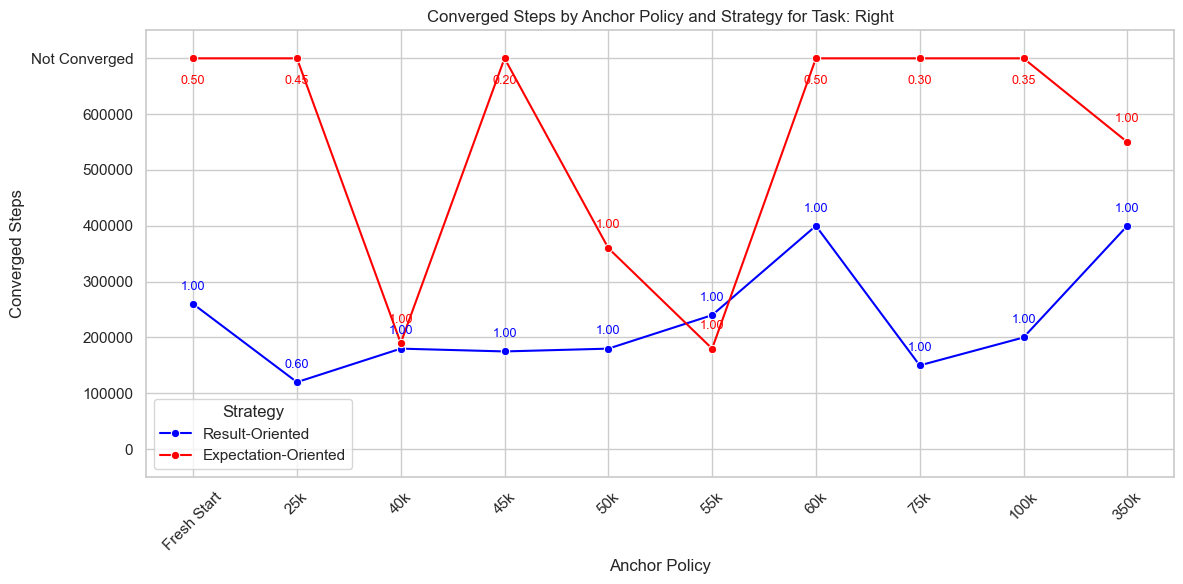

In [6]:
# Assuming 'data' DataFrame is already loaded and preprocessed
# Replace 'No Convergence' with NaN and convert to float
combined_csv['Converged Steps'] = combined_csv['Converged Steps'].replace('No Convergence', np.nan).astype(float)
combined_csv['Max Success Rate'] = pd.to_numeric(combined_csv['Max Success Rate'], errors='coerce')

combined_csv['Anchor-Policy'] = pd.Categorical(combined_csv['Anchor-Policy'], categories=anchor_order, ordered=True)

# Define the palette
palette = {'Result-Oriented': 'blue', 'Expectation-Oriented': 'red'}

# Assign a high value for "Not Converged"
not_converged_value = 700000  # This is arbitrary; adjust based on your y-axis scale
combined_csv['Converged Steps Filled'] = combined_csv['Converged Steps'].fillna(not_converged_value)

# Plotting for each task
tasks = combined_csv['Task'].unique()
for task in tasks:
    plt.figure(figsize=(12, 6))
    task_data = combined_csv[combined_csv['Task'] == task]

    for idx, strategy in enumerate(task_data['Strategy'].unique()):
        subset = task_data[task_data['Strategy'] == strategy]
        color = palette[strategy]

        sns.lineplot(
            data=subset,
            x='Anchor-Policy',
            y='Converged Steps Filled',
            marker='o',
            label=strategy,
            color=color,
        )

        # Annotate max success rate above each point with offset to avoid overlap
        for i, (x, y, msr) in enumerate(zip(subset['Anchor-Policy'], subset['Converged Steps Filled'], subset['Max Success Rate'])):
            if y == not_converged_value:
                plt.text(
                    x,
                    y - 20000 - (10000 * idx),  # Offset to avoid overlap
                    f"{msr:.2f}" if not np.isnan(msr) else "",
                    color=color,
                    ha='center',
                    va='top',
                    fontsize=9,
                )
            else:
                plt.text(
                    x,
                    y + 20000 + (10000 * idx),  # Offset to avoid overlap
                    f"{msr:.2f}" if not np.isnan(msr) else "",
                    color=color,
                    ha='center',
                    va='bottom',
                    fontsize=9,
                )

    # Adjust y-axis to include "Not Converged" and minimize empty space
    plt.title(f'Converged Steps by Anchor Policy and Strategy for Task: {task}')
    plt.xlabel('Anchor Policy')
    plt.ylabel('Converged Steps')
    yticks = list(plt.yticks()[0])  # Get current y-tick positions
    yticks = [tick for tick in yticks if tick < not_converged_value]  # Remove excessive ticks
    plt.yticks(yticks + [not_converged_value], list(map(int, yticks)) + ['Not Converged'])

    plt.ylim(min(yticks) - 50000, not_converged_value + 50000)  # Adjust y-axis limits
    plt.legend(title='Strategy')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Pearson Correlation: -0.52, p-value: 0.0007
Spearman Correlation: -0.53, p-value: 0.0005


c:\Users\Konstantin\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


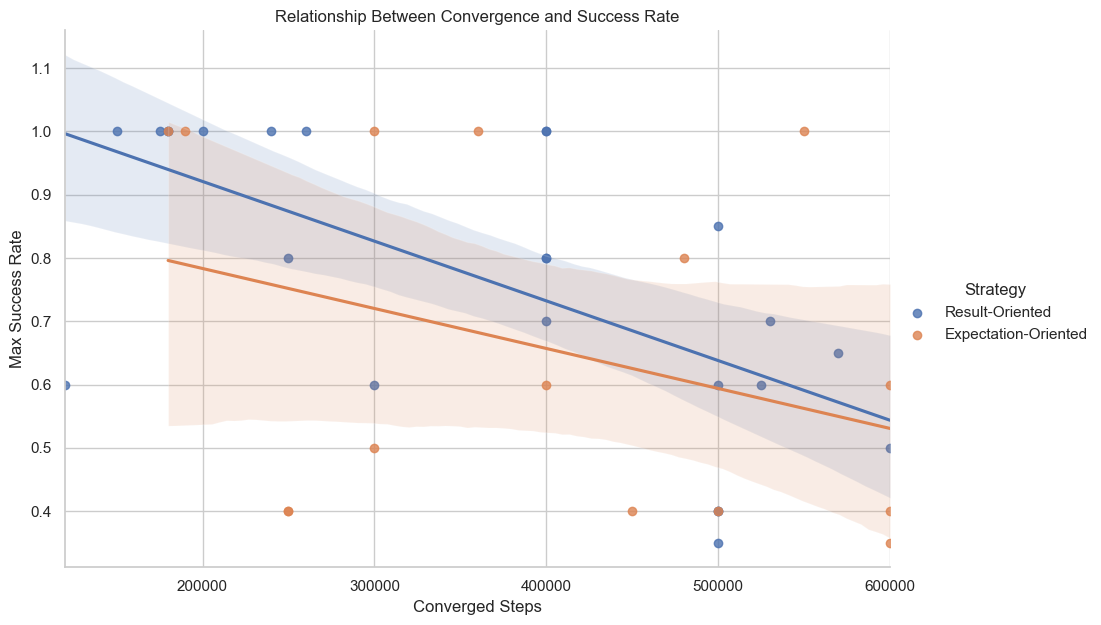

Result-Oriented Strategy (blue line):
There is a negative relationship between Converged Steps and Max Success Rate. 
As the number of steps required to converge increases, the maximum success rate tends to decrease. 
This suggests that faster convergence tends to result in higher success rates for this strategy.
The slope of the blue line reflects the strength of this trend. 
A steeper slope would indicate a stronger negative correlation. Expectation-Oriented Strategy (orange line): 
Similarly, a negative relationship exists for this strategy, but the slope appears to be slightly less steep than the Result-Oriented strategy.
 This could suggest that the negative impact of slower convergence is somewhat less pronounced for the Expectation-Oriented strategy.


In [7]:

# Drop rows with missing values (NaN)
filtered_data = combined_csv.dropna(subset=['Converged Steps', 'Max Success Rate'])

# Calculate Pearson Correlation (linear relationship)
pearson_corr, pearson_pval = pearsonr(filtered_data['Converged Steps'], filtered_data['Max Success Rate'])
print(f"Pearson Correlation: {pearson_corr:.2f}, p-value: {pearson_pval:.4f}")

# Calculate Spearman Correlation (rank-based, non-linear relationship)
spearman_corr, spearman_pval = spearmanr(filtered_data['Converged Steps'], filtered_data['Max Success Rate'])
print(f"Spearman Correlation: {spearman_corr:.2f}, p-value: {spearman_pval:.4f}")

sns.lmplot(
    data=combined_csv,
    x='Converged Steps',
    y='Max Success Rate',
    hue='Strategy',
    ci=95,
    height=6,
    aspect=1.5,
)
plt.title("Relationship Between Convergence and Success Rate")
plt.show()

print("Result-Oriented Strategy (blue line):\nThere is a negative relationship between Converged Steps and Max Success Rate. \nAs the number of steps required to converge increases, the maximum success rate tends to decrease. \nThis suggests that faster convergence tends to result in higher success rates for this strategy.\nThe slope of the blue line reflects the strength of this trend. \nA steeper slope would indicate a stronger negative correlation. Expectation-Oriented Strategy (orange line): \nSimilarly, a negative relationship exists for this strategy, but the slope appears to be slightly less steep than the Result-Oriented strategy.\n This could suggest that the negative impact of slower convergence is somewhat less pronounced for the Expectation-Oriented strategy.")

In [8]:
def process_selected_demo_states(x):
    if isinstance(x, str):
        # If x is a string, split it and convert to integers
        return [int(s.strip()) for s in x.split(',')]
    elif isinstance(x, list):
        # If x is already a list, ensure all elements are integers
        return [int(s) for s in x]
    else:
        # Handle other data types if necessary
        return x  # Or raise an error

combined_csv['Selected Demo States'] = combined_csv['Selected Demo States'].apply(process_selected_demo_states)

# Feature: Number of Unique Demo States
combined_csv['Num Unique States'] = combined_csv['Selected Demo States'].apply(lambda x: len(set(x)))

# Feature: Average State Value
combined_csv['Average State'] = combined_csv['Selected Demo States'].apply(lambda x: np.mean(x))

# Prepare data for correlation analysis
corr_features = ['Max Success Rate', 'Converged Steps', 'Num Unique States', 'Average State']
corr_data = combined_csv[corr_features].dropna()

# Compute correlation matrix
corr_matrix = corr_data.corr()
print(corr_matrix)

                   Max Success Rate  Converged Steps  Num Unique States  \
Max Success Rate           1.000000        -0.521373          -0.179172   
Converged Steps           -0.521373         1.000000           0.135596   
Num Unique States         -0.179172         0.135596           1.000000   
Average State              0.351976        -0.088593          -0.006415   

                   Average State  
Max Success Rate        0.351976  
Converged Steps        -0.088593  
Num Unique States      -0.006415  
Average State           1.000000  


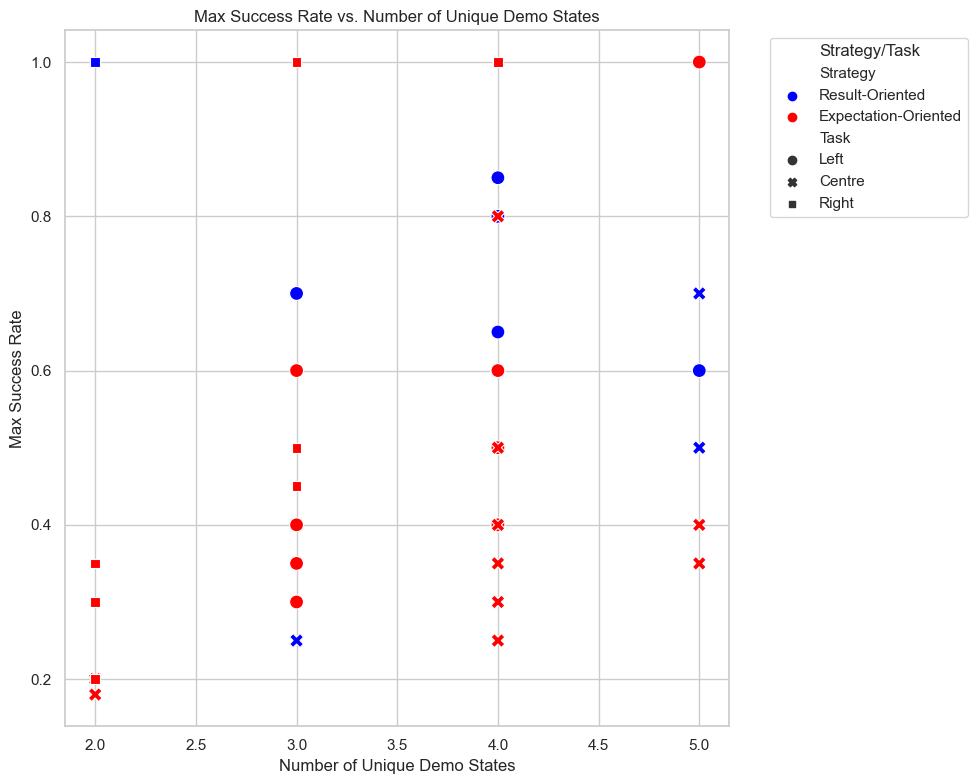

In [9]:
# Create the scatter plot
plt.figure(figsize=(10, 8))  # Increase the figure size
sns.scatterplot(
    data=combined_csv,
    x='Num Unique States',
    y='Max Success Rate',
    hue='Strategy',
    palette=palette,
    style='Task',
    s=100
)
plt.title('Max Success Rate vs. Number of Unique Demo States')
plt.xlabel('Number of Unique Demo States')
plt.ylabel('Max Success Rate')

# Move the legend to the right outside the plot
plt.legend(title='Strategy/Task', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Slope (Coefficient): 0.08850684363334721
Intercept: 0.26540024885939417
R-squared: 0.06811408285401122


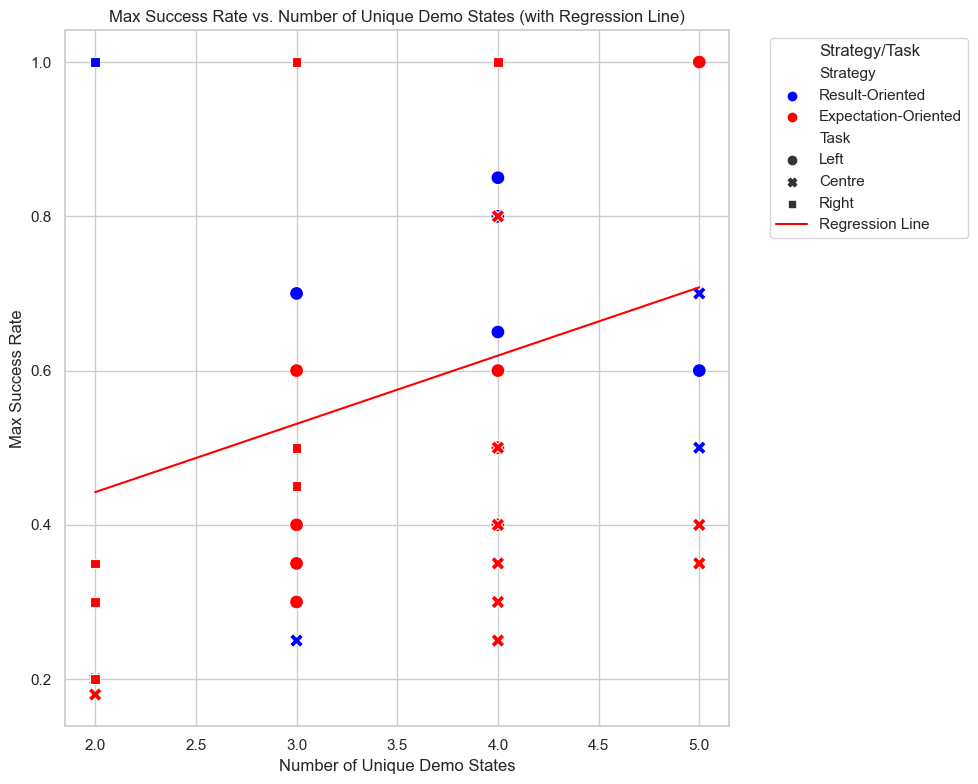

In [18]:
# Prepare the data for regression
X = combined_csv['Num Unique States'].values.reshape(-1, 1)  # Predictor variable
y = combined_csv['Max Success Rate'].values  # Target variable

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Get regression coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Predict values for the regression line
y_pred = model.predict(X)

# Calculate R-squared value
r2 = r2_score(y, y_pred)

# Print regression results
print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r2}")

# Prepare data for scatterplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Scatter plot with strategy and task as markers
sns.scatterplot(
    data=combined_csv,
    x='Num Unique States',
    y='Max Success Rate',
    hue='Strategy',
    style='Task',
    palette={'Result-Oriented': 'blue', 'Expectation-Oriented': 'red'},
    s=100,  # Marker size
)

# Plot regression line
X_vals = np.linspace(combined_csv['Num Unique States'].min(), combined_csv['Num Unique States'].max(), 100).reshape(-1, 1)
y_vals = model.predict(X_vals)
plt.plot(X_vals, y_vals, color='red', label='Regression Line')

# Title and labels
plt.title('Max Success Rate vs. Number of Unique Demo States (with Regression Line)')
plt.xlabel('Number of Unique Demo States')
plt.ylabel('Max Success Rate')

# Move the legend outside the plot
plt.legend(title='Strategy/Task', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

c:\Users\Konstantin\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


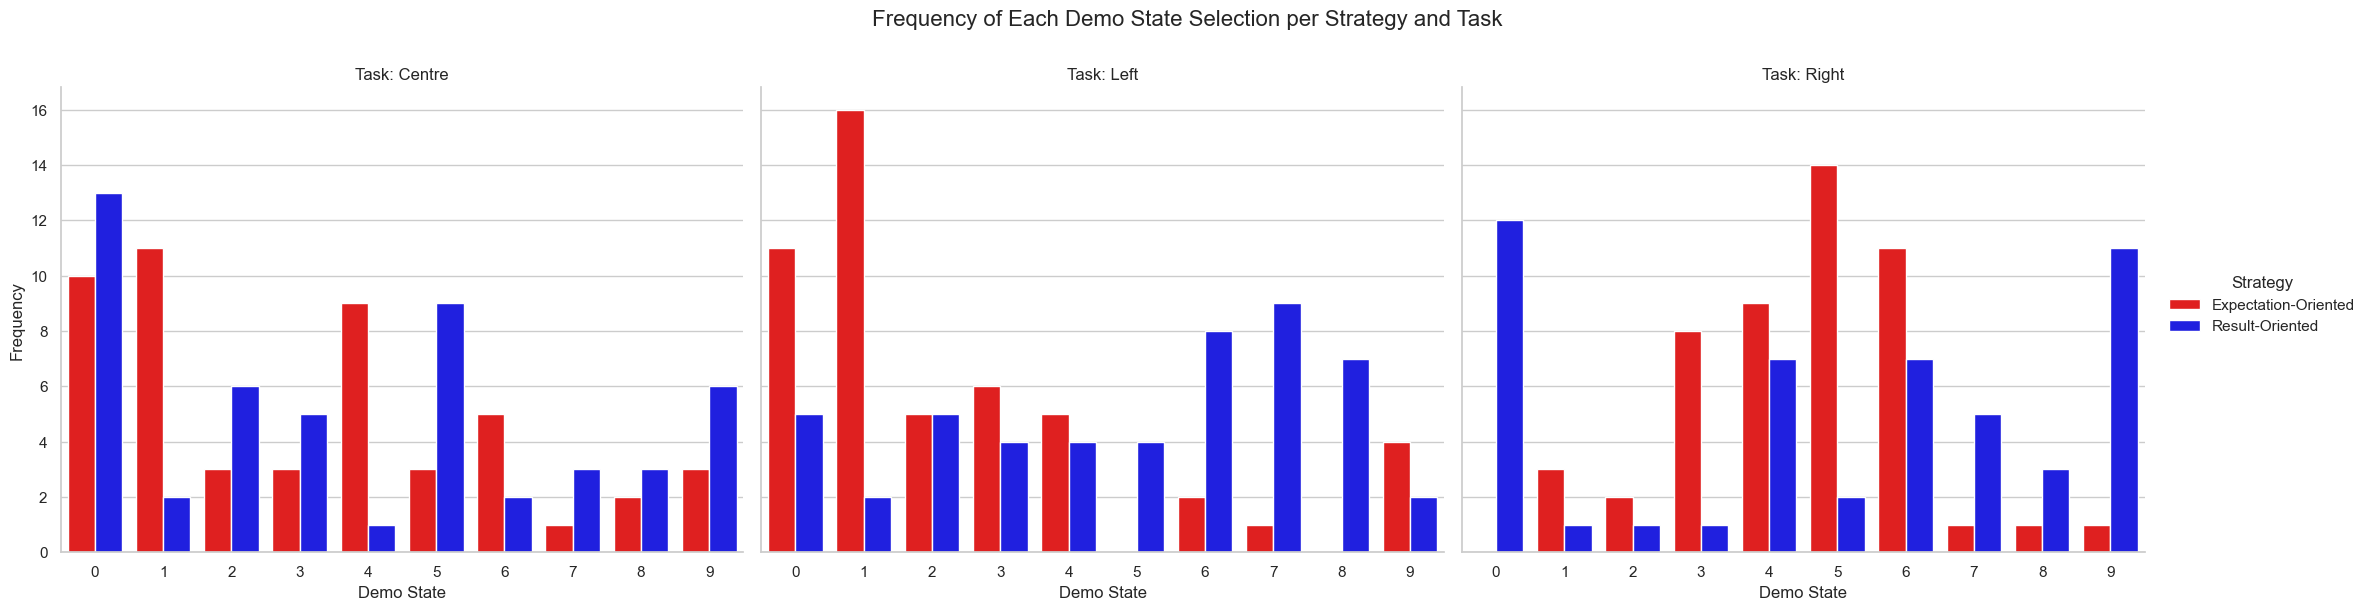

In [30]:
# Explode 'Selected Demo States' to individual rows
exploded_data = combined_csv.explode('Selected Demo States')
exploded_data['Selected Demo States'] = exploded_data['Selected Demo States'].astype(int)

# Group by 'Strategy', 'Task', and 'Selected Demo States' and count frequencies
state_counts = exploded_data.groupby(['Strategy', 'Task', 'Selected Demo States']).size().reset_index(name='Count')

# Ensure 'Selected Demo States' is ordered correctly
state_counts['Selected Demo States'] = state_counts['Selected Demo States'].astype(int)
state_counts['Selected Demo States'] = state_counts['Selected Demo States'].astype('category')
state_counts['Selected Demo States'] = state_counts['Selected Demo States'].cat.set_categories(list(range(10)))

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Define the palette if not already defined
palette = {'Result-Oriented': 'blue', 'Expectation-Oriented': 'red'}

# Create the bar plot
g = sns.catplot(
    data=state_counts,
    x='Selected Demo States',
    y='Count',
    hue='Strategy',
    col='Task',
    kind='bar',
    palette=palette,
    height=6,
    aspect=1.2
)
g.set_titles('Task: {col_name}')
g.set_axis_labels('Demo State', 'Frequency')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Frequency of Each Demo State Selection per Strategy and Task', fontsize=16)
plt.show()

In [31]:
close_to_goal_states = {
    'Left': [0, 1, 2],
    'Centre': [4, 5, 6],
    'Right': [7, 8, 9]
}

def process_demo_states(row):
    task = row['Task']
    selected_demo_states_str = row['Selected Demo States']
    # Convert the string to a list of integers
    selected_demo_states = [int(state.strip()) for state in selected_demo_states_str.split(',')]
    # Calculate spread
    spread = max(selected_demo_states) - min(selected_demo_states)
    # Count number of demos close to goal
    close_states = close_to_goal_states.get(task, [])
    num_close_to_goal = sum(1 for state in selected_demo_states if state in close_states)
    return pd.Series({'Spread of Demonstrations': spread, 'Number of Demos Close to Goal': num_close_to_goal})

# Apply the function to each row
combined_data[['Spread of Demonstrations', 'Number of Demos Close to Goal']] = combined_data.apply(process_demo_states, axis=1)


In [43]:
# Define color palette for 'Strategy'
strategy_palette = {'Result-Oriented': 'blue', 'Expectation-Oriented': 'red'}

# Define marker mapping for 'Task'
task_markers = {'Left': 'o', 'Centre': 'X', 'Right': 's'}

# plt.figure(figsize=(8,6))
# ax = sns.scatterplot(
#     data=combined_data,
#     x='Number of Demos Close to Goal',
#     y='Max Success Rate',
#     hue='Strategy',
#     style='Task',
#     palette=strategy_palette,
#     markers=task_markers,
#     s=70,
#     alpha=0.7
# )

# # Fit linear regression model for each 'Strategy' and plot the regression lines
# for strategy, color in strategy_palette.items():
#     strategy_data = combined_data[combined_data['Strategy'] == strategy]
#     X = strategy_data[['Number of Demos Close to Goal']]
#     y = strategy_data['Max Success Rate']
#     if len(X) > 1:  # Need at least two points to fit a line
#         model = LinearRegression()
#         model.fit(X, y)
#         X_vals = np.linspace(X['Number of Demos Close to Goal'].min(), X['Number of Demos Close to Goal'].max(), 100).reshape(-1,1)
#         y_vals = model.predict(X_vals)
#         plt.plot(X_vals, y_vals, color=color, linestyle='--', label=f'{strategy} Regression Line')

# # Title and labels
# plt.title('Max Success Rate vs. Number of Demos Close to Goal')
# plt.xlabel('Number of Demos Close to Goal')
# plt.ylabel('Max Success Rate')

# # Adjust legend to prevent duplicates
# handles, labels = ax.get_legend_handles_labels()
# # Create a dictionary to remove duplicate labels
# from collections import OrderedDict
# by_label = OrderedDict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# plt.tight_layout()
# plt.show()

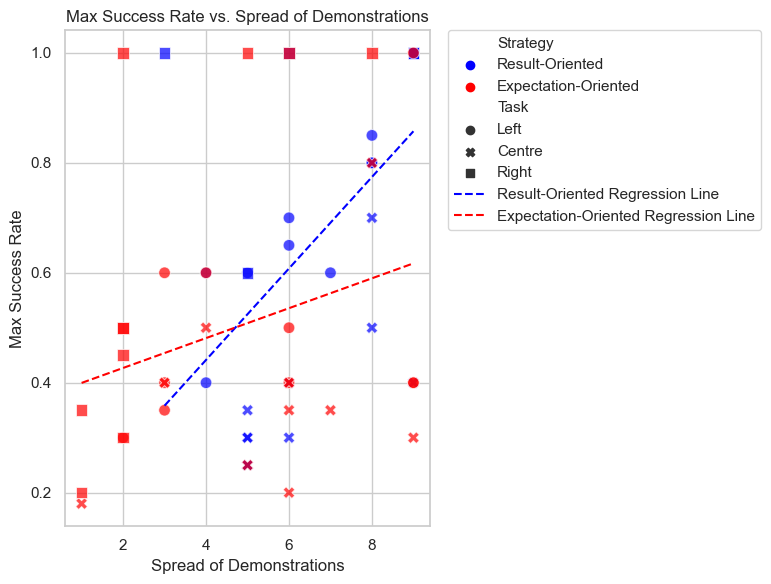

In [41]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(
    data=combined_data,
    x='Spread of Demonstrations',
    y='Max Success Rate',
    hue='Strategy',
    style='Task',
    palette=strategy_palette,
    markers=task_markers,
    s=70,
    alpha=0.7
)

# Fit linear regression model for each 'Strategy' and plot the regression lines
for strategy, color in strategy_palette.items():
    strategy_data = combined_data[combined_data['Strategy'] == strategy]
    X = strategy_data[['Spread of Demonstrations']]
    y = strategy_data['Max Success Rate']
    if len(X) > 1:
        model = LinearRegression()
        model.fit(X, y)
        X_vals = np.linspace(X['Spread of Demonstrations'].min(), X['Spread of Demonstrations'].max(), 100).reshape(-1,1)
        y_vals = model.predict(X_vals)
        plt.plot(X_vals, y_vals, color=color, linestyle='--', label=f'{strategy} Regression Line')

# Title and labels
plt.title('Max Success Rate vs. Spread of Demonstrations')
plt.xlabel('Spread of Demonstrations')
plt.ylabel('Max Success Rate')

# Adjust legend
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

# Participant training result analysis